Student Name: Yohannes Tigabu

Student Number: 301324061

Assignmnet #2- K-Means & DBSCAN Clustering

In [25]:
# Load the Olivetti Faces Dataset

In [26]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

In [27]:
faces = fetch_olivetti_faces()

In [28]:
print(f"Dataset shape: {faces.images.shape}")
print(f"Number of samples: {faces.images.shape[0]}")
print(f"Number of classes: {len(set(faces.target))}")

Dataset shape: (400, 64, 64)
Number of samples: 400
Number of classes: 40


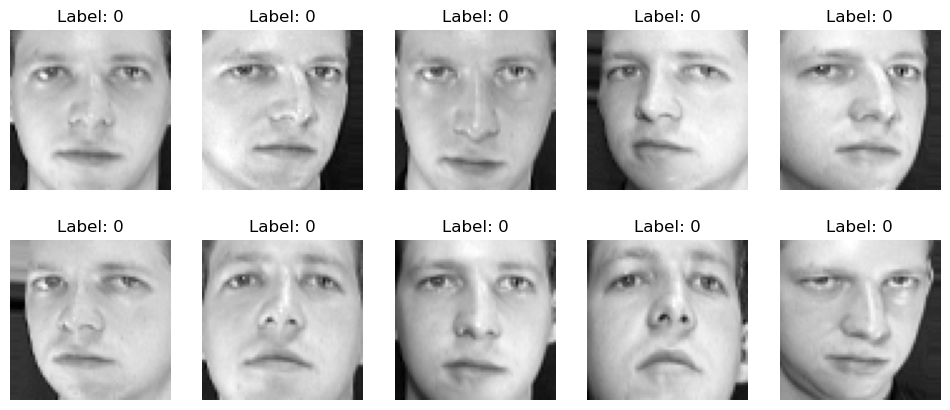

In [29]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for ax, image, label in zip(axes.ravel(), faces.images, faces.target):
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.show()

In [30]:
# Step 2: Stratified Split of the Data
from sklearn.model_selection import train_test_split
import numpy as np

In [31]:
# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(
    faces.data, faces.target, test_size=0.3, stratify=faces.target, random_state=61
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=61
)


In [32]:
# Display the number of samples in each set
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 280 samples
Validation set: 60 samples
Test set: 60 samples


In [33]:
# Verify stratification
print("Training set label distribution:", np.bincount(y_train))
print("Validation set label distribution:", np.bincount(y_val))
print("Test set label distribution:", np.bincount(y_test))

Training set label distribution: [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7]
Validation set label distribution: [2 1 1 2 1 1 2 2 2 2 1 2 2 2 1 1 1 2 1 1 2 2 1 1 2 1 2 2 1 1 2 2 2 1 1 1 1
 1 2 2]
Test set label distribution: [1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 2 1 2 2 1 1 2 2 1 2 1 1 2 2 1 1 1 2 2 2 2
 2 1 1]


In [34]:
# Step 3: K-Fold Cross-Validation
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [35]:
# Initialize the classifier
classifier = SVC(kernel='linear', random_state=42)

In [36]:
# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)

In [37]:

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")

Cross-validation scores: [0.98214286 0.89285714 0.92857143 0.96428571 0.91071429]
Mean CV accuracy: 0.9357


In [38]:
# Train the classifier on the entire training set
classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [39]:
# Evaluate on the validation set
val_accuracy = classifier.score(X_val, y_val)
print(f"Validation set accuracy: {val_accuracy:.4f}")

Validation set accuracy: 0.9167


In [40]:
# Step 4: K-Means Clustering and Silhouette Score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [41]:
# Reduce dimensionality with PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(faces.data)

In [42]:
# Range for the number of clusters
range_n_clusters = range(2, 21)
silhouette_avg = []

# K-Means and Silhouette Score
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    silhouette_avg.append(silhouette_score(X_pca, cluster_labels))

/Users/yohannes/anaconda3/envs/Assignmnet2/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yohannes/anaconda3/envs/Assignmnet2/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yohannes/anaconda3/envs/Assignmnet2/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yohannes/anaconda3/envs/Assignmnet2/lib/python3.8/site-packages/sklearn/cluster/_kme

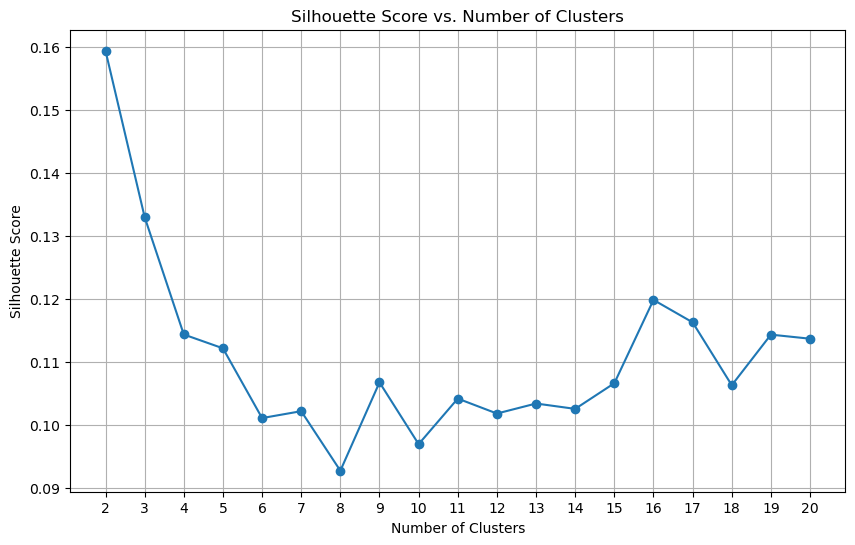

In [43]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

In [44]:
# Optimal number of clusters based on silhouette score
optimal_clusters = np.argmax(silhouette_avg) + 2  # +2 because of the range starting from 2
print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 2


In [45]:
# Step 5: Train Classifier on Reduced Dataset with K-Means Clustering
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Use PCA for dimensionality reduction if not already done
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_train)

# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_pca)

# Transform the training set using the cluster centers
X_train_kmeans = kmeans.transform(X_pca)

# Train a classifier on the K-Means transformed features
classifier_reduced = SVC(kernel='linear', random_state=42)
classifier_reduced.fit(X_train_kmeans, y_train)

# Transform the validation set using the same PCA and K-Means
X_val_pca = pca.transform(X_val)
X_val_kmeans = kmeans.transform(X_val_pca)

# Evaluate on the validation set
val_predictions = classifier_reduced.predict(X_val_kmeans)
val_accuracy_reduced = accuracy_score(y_val, val_predictions)
print(f"Validation set accuracy on K-Means features: {val_accuracy_reduced:.4f}")

Validation set accuracy on K-Means features: 0.1833


/Users/yohannes/anaconda3/envs/Assignmnet2/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Estimated number of clusters: 0
Estimated number of noise points: 280


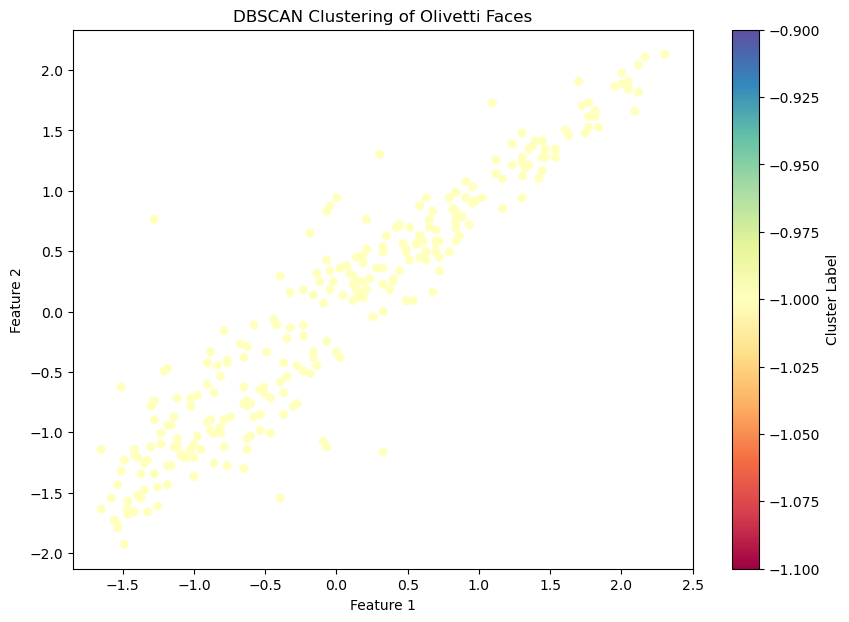

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Preprocess the images (Standardization)
# Flatten the images if not already done (assuming X_train and X_val are already flat)
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flattening for DBSCAN
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_val_scaled = scaler.transform(X_val_flat)

# Step 2: Apply DBSCAN
# Choose parameters for DBSCAN
epsilon = 0.5  # Maximum distance between samples for one to be considered as in the neighborhood of another
min_samples = 5  # Minimum number of samples in a neighborhood for a point to be a core point

# Fit DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(X_train_scaled)

# Get the labels for each point
dbscan_labels = dbscan.labels_

# Step 3: Evaluate the results
# Number of clusters and noise points
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Exclude noise
n_noise = list(dbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Step 4: Visualizing the clustering results (optional)
import matplotlib.pyplot as plt

# Create a scatter plot of the first two features (if using PCA)
if X_train_scaled.shape[1] > 1:  # Ensure there are at least 2 dimensions
    plt.figure(figsize=(10, 7))
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=dbscan_labels, cmap='Spectral', s=30)
    plt.title("DBSCAN Clustering of Olivetti Faces")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label='Cluster Label')
    plt.show()
